Ariel university

<h3><center>Course name: Deep learning and natural language processing</center></h3>

Course number: 7061510-1

Lecturer: Dr. Amos Azaria

The editor: Moshe Hanukoglu

Date: First Semester 2018-2019

<a id='contents'></a>
### Table of contents
* [Linear Regression](#linear_regression)
    * [Motivation To Loss Function](#motivation_to_loss_function_linear)
    * [Gradient Descent](#gradient_descent_linear)
        * [BGD, SGD, MB-GD](#bgd_sgd_mb-gd)
    * [Adding Features](#adding_features)
    * [Over Fitting](#over_fitting)
    * [Regularization](#regularization)
        * [Lasso and Ridge](#lasso_ridge)
        * [Early Stopping](#early_stopping)
    * [Normalization](#normalization)
* [Logistic Regression](#logistic_regression)
    * [Motivation To Loss Function](#motivation_to_loss_function_logistic)
    * [Gradient Descent](#gradient_descent_logistic)
    * [Example Of Classification](#example_of_classification)
    * [The Quality Of The Classifier](#the_quality_of_the_classifier)
    * [Imbalanced Data](#imbalanced_data)
    * [Multiple Classes (SoftMax)](#multiple_classes)
    * [Example - SMS Classification](#example_sms_classification)
* [Summary](#summary)

Based on presentations by Dr. Amos Azaria

[^ Contents](#contents)
# Linear Regression
<a id='linear_regression'></a>

The task we want to do now is predicting missing information based on information we have that is close to the information we lack.

The method we use is called "Linear regression".


We will take an example problem so that we will have more rest to demonstrate the solution.
<br>Our problem is to predict the price of the Galaxy 5 number phones.
<br>We know prices of Galaxy number 2,3,4,6,7.

<img src="Linear_regression_mean_line.png" width="400">

Linear regression is a method that searches for the straight y = wx + b so that the mean of the distances of the straight from each of the points on the graph is minimal.
<br>The red line in the picture above is the one we are looking for.

Formally, each value of $ x \in \{x_1,x_2,x_3,…x_m\}$(Galaxy number) has a value of $ y \in \{y_1,y_2,y_3…y_m\} $ (its price).
<br>For each $ x_i $ and $ y_i $, $ y_i = w x_i + b $.
We will essentially want to achieve the minimum function $ \frac{1}{m} * $$\sum_{i=1}^{m} |wx_i + b - y_i| $.
<br>The minimum is found by the gradient descent.
<br>For ease of work, we will change the function a bit and write it down like this: $ \frac{1}{2m} * $$\sum_{i=1}^{m} \left(wx_i + b - y_i\right)^2 $

Our task is to find the w and b that give us the minimum of the function.

[^ contents](#contents)
## Motivation To Loss Function
<a id='motivation_to_loss_function_linear'></a>

We would like to show that the y values we have in dataset are the real values or very close to real values with little "noise", rather than values obtained as a result of a lot of noise entering the results.

In other words, suppose the noise is divided by Gaussian with mean 0 and variance ...

Therefore, the formula is $ \epsilon \sim N(0,\sigma^2) $.

The Gaussian distribution can be said $ p(\epsilon_i) = \frac{1}{\sqrt{2\Pi}\sigma}e^{-\frac{(\epsilon_i)^2}{2{\sigma}^2\\}} $

And therefore will also take place $ p(y_i|x_i;w,b) = \frac{1}{\sqrt{2\Pi}\sigma}e^{-\frac{(y_i - (wx_i+b))^2}{2{\sigma}^2\\}} $

As a result of all this we want to maximize the probability  $ p(y|x;w,b) $ to say that the probability of getting yi given $x_i, w, n$ is the highest, which means that the data we received is the most likely, and not that it is reasonable but with a lot of noise.

$$ p(y|x;w,b) = \prod_{i=1}^{m} p(y_i|x_i;w,b) = \prod_{i=1}^{m}  \frac{1}{\sqrt{2\Pi}\sigma}e^{-\frac{(y_i - (wx_i+b))^2}{2{\sigma}^2\\}} $$

We will apply log on both wings.

$$ log(p(y|x;w,b)) = log \left(\prod_{i=1}^{m}  \frac{1}{\sqrt{2\Pi}\sigma}e^{-\frac{(y_i -  (wx_i+b))^2}{2{\sigma}^2\\}}\right) = \sum_{i=1}^{m} log\left(\frac{1}{\sqrt{2\Pi}\sigma}e^{-\frac{(y_i -  (wx_i+b))^2}{2{\sigma}^2\\}}\right) = m log\left(\frac{1}{\sqrt{2\Pi}\sigma}\right) +  \sum_{i=1}^{m} log\left(e^{-\frac{(y_i -  (wx_i+b))^2}{2{\sigma}^2\\}}\right) =  m log\left(\frac{1}{\sqrt{2\Pi}\sigma}\right) - \sum_{i=1}^{m} \frac{(y_i -  (wx_i+b))^2}{2{\sigma}^2\\}$$

Because $$ log\left(\frac{1}{\sqrt{2\Pi}\sigma}\right) $$ is constant, then to get the greatest value we want $$ \sum_{i=1}^{m} \frac{(y_i -  (wx_i+b))^2}{2{\sigma}^2\\} = \frac{1}{2{\sigma}^2\\}\sum_{i=1}^{m} (y_i -  (wx_i+b))^2$$  to be as small as possible (because it is negative)

So we calculate the gradient in its negative direction.


Note: In order to understand more deeply the motivation for this function, you can read this [link](https://www.quora.com/When-one-uses-the-squared-loss-function-for-regression-does-it-mean-you-implicitly-assume-that-your-adding-Gaussian-noise-with-same-variance)

Note: Linear regression has a closed-form solution $ W = (X^TX)^{-1}X^TY $

[^ contents](#contents)
## Gradient Descent
<a id='gradient_descent_linear'></a>

Our way of finding the minimum of function is by Gradient Descent.
 
<br>In this method we calculate the gradient.
<br>The gradient gives us the direction of the incline upwards, so to get the minimum direction we need to multiply -1.
<br>As can be seen in the picture.
<img src="gradient-trajectory.png" width="500px"/>
credite: [link](http://ludovicarnold.altervista.org/teaching/optimization/gradient-descent/)

Now we calculate the gradient of our function, $ J(w,b) = \frac{1}{2m} * $$\sum_{i=1}^{m} (wx_i + b - y_i)^2 $.
<br>$ \bigtriangledown J(w,b) = (\frac{\partial J}{\partial w}, \frac{\partial J}{\partial b})$
<br>$\frac{\partial J}{\partial w} = \frac{1}{2m} * $$\sum_{i=1}^{m} 2(wx_i + b - y_i)*x_i = \frac{1}{m} * $$\sum_{i=1}^{m} (wx_i + b - y_i)*x_i$
<br>$\frac{\partial J}{\partial b} = \frac{1}{2m} * $$\sum_{i=1}^{m} 2(wx_i + b - y_i)*1 = \frac{1}{m} * $$\sum_{i=1}^{m} (wx_i + b - y_i)$

<br>$ \bigtriangledown J(w,b) = \left(\frac{1}{m} * \sum_{i=1}^{m} (wx_i + b - y_i)*x_i, \frac{1}{m} * \sum_{i=1}^{m} (wx_i + b - y_i)\right)$

When we have the gradient we can write out an algorithm to linear regression.

Upload the data of Galaxy prices. 

In [1]:
import numpy as np
galaxy_data = np.array([[2,70],[3,110],[4,165],[6,390],[7,550]])

Inetialise the w, b and alpha (learning rate).

In [2]:
w = 0
b = 0
alpha = 0.01

We run 10000 epochs when each epoch calculate the gradient and adds it to w, b.

After all 200 epochs printed on the screen the number of iteration, the gradient of w, the gradient of b, the new value of w and the new value of b. 

In [3]:
for iteration in range(10000):
    gradient_b = np.mean(1*(galaxy_data[:,1]-(w*galaxy_data[:,0]+b)))
    gradient_w = np.mean(galaxy_data[:,0]*(galaxy_data[:,1]-(w*galaxy_data[:,0]+b)))
    b += alpha*gradient_b
    w += alpha*gradient_w
    if iteration % 200 == 0 :
        print("it:%d,  grad_w:%.3f, grad_b:%.3f, w:%.3f, b:%.3f" %(iteration, gradient_w, gradient_b, w, b))

it:0,  grad_w:1464.000, grad_b:257.000, w:14.640, b:2.570
it:200,  grad_w:3.825, grad_b:-19.693, w:70.598, b:-33.968
it:400,  grad_w:2.859, grad_b:-14.720, w:77.230, b:-68.115
it:600,  grad_w:2.137, grad_b:-11.003, w:82.188, b:-93.639
it:800,  grad_w:1.597, grad_b:-8.224, w:85.893, b:-112.717
it:1000,  grad_w:1.194, grad_b:-6.147, w:88.663, b:-126.977
it:1200,  grad_w:0.892, grad_b:-4.595, w:90.733, b:-137.636
it:1400,  grad_w:0.667, grad_b:-3.434, w:92.280, b:-145.604
it:1600,  grad_w:0.499, grad_b:-2.567, w:93.437, b:-151.559
it:1800,  grad_w:0.373, grad_b:-1.919, w:94.301, b:-156.010
it:2000,  grad_w:0.279, grad_b:-1.434, w:94.948, b:-159.338
it:2200,  grad_w:0.208, grad_b:-1.072, w:95.431, b:-161.825
it:2400,  grad_w:0.156, grad_b:-0.801, w:95.792, b:-163.684
it:2600,  grad_w:0.116, grad_b:-0.599, w:96.062, b:-165.073
it:2800,  grad_w:0.087, grad_b:-0.448, w:96.263, b:-166.112
it:3000,  grad_w:0.065, grad_b:-0.335, w:96.414, b:-166.888
it:3200,  grad_w:0.049, grad_b:-0.250, w:96.52

After we have the correct w, b we can recognise the price of Galaxy 5.

In [4]:
print("Estimated price for Galaxy S5: ", w*5 + b)

Estimated price for Galaxy S5:  315.1162815729334


[^ contents](#contents)
### BGD, SGD, MB-GD
<a id='bgd_sgd_mb-gd'></a>

The three approaches that will be presented later differ in their opinion of how each percentage of the data calculates the gradient each iteration.

* Batch Gradient Descent (BGD): uses all Data-set to compute gradient at a time. Performs an average of all the data and then calculate the gradient.
* Stochastic Gradient Descent (SGD): uses only a single example at a time (shuffle data first).
* Mini-Batch Gradient Descent (MB-GD): uses only a subset of the data-set, (e.g. 50) at a time (requires shuffle as well).

[^ contents](#contents)
## Adding Features
<a id='adding_features'></a>

So far we have used one feature for each value.
<br>In order to make our prediction results more accurate, we would like to add more features.
<br>The addition of the features can be done using two methods,
1. A natural method to introduce more features to the system on each of the values.
2. An artificial method takes the existing feature x and adds other features $ x^2, x^3, ...$

When there are $ n $ features need weight for each feature and therefore there will be $ n $ weights

Create a table in size 2 on n, n will be determined later in the program and initialize W to table in size 2X1 because there are 2 features  for each point in the train data.

In this case, we added features by an artificial method.

In [5]:
import tensorflow as tf
import numpy as np

features = 2
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
data_x = np.array([[2,4],[3,9],[4,16],[6,36],[7,49]])
data_y = np.array([[70],[110],[165],[390],[550]])

initialize the loss function and update function that runs the gradient descent with alpha 0.001 and our loss function.

In [6]:
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2))
update = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [8]:
for i in range(100000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    if i % 10000 == 0 :
        print('Iteration:' , i , ' W:' , sess.run(W) , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

Iteration: 0  W: [[ 2.9280002]
 [17.960001 ]]  b: [0.514]  loss: 44111.715
Iteration: 10000  W: [[-8.662441]
 [11.771298]]  b: [25.665333]  loss: 112.03969
Iteration: 20000  W: [[-17.871014]
 [ 12.74393 ]]  b: [44.263157]  loss: 68.60526
Iteration: 30000  W: [[-24.862799]
 [ 13.482421]]  b: [58.38387]  loss: 43.56598
Iteration: 40000  W: [[-30.171246]
 [ 14.043115]]  b: [69.10478]  loss: 29.13128
Iteration: 50000  W: [[-34.201736]
 [ 14.46882 ]]  b: [77.24501]  loss: 20.809607
Iteration: 60000  W: [[-37.261272]
 [ 14.791976]]  b: [83.424126]  loss: 16.01305
Iteration: 70000  W: [[-39.583096]
 [ 15.037201]]  b: [88.11371]  loss: 13.248581
Iteration: 80000  W: [[-41.345997]
 [ 15.223399]]  b: [91.67423]  loss: 11.654467
Iteration: 90000  W: [[-42.68493 ]
 [ 15.364842]]  b: [94.37757]  loss: 10.735038


The actual price of Galaxy 5: $250

In [9]:
print('Prediction for Galaxy 5:', np.matmul(np.array([5,25]),sess.run(W)) + sess.run(b))

Prediction for Galaxy 5: [264.72851753]


The actual price of Galaxy 1: $30

In [10]:
print('Prediction for Galaxy 1:', np.matmul(np.array([1,1]),sess.run(W)) + sess.run(b))

Prediction for Galaxy 1: [68.20199776]


[^ contents](#contents)
## Over Fitting
<a id='over_fitting'></a>

Over-Fitting is a problem that is created when we add too many attributes because when there are too many features, the model learns to predict precisely the information it is trained on, but when you introduce new information that it did not see, it doesn't know to predict it.

At the end of the program, we see a graph that describes the over-fitting in the price of Galaxy 8, the price is under <b> 0$ </b>

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def vecto(x):
# This function returns an array of numbers with 20 (#features) features.
    ret = []
    for i in suff_feat:
        ret.append(x**i / 7.**i)
    return ret

features = 20
suff_feat = np.array(range(1,features+1))
np.random.shuffle(suff_feat)

x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2))
update = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
data_x = np.array([vecto(2),vecto(3),vecto(4),vecto(6),vecto(7)])
data_y = np.array([[70],[110],[165],[390],[550]])

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,1000000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    if i % 100000 == 0 :
        print('Iteration:' , i , ' W:' , sess.run(W) , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

Iteration: 0  W: [[25.36474 ]
 [31.291296]
 [23.325127]
 [23.546486]
 [22.834103]
 [26.625336]
 [27.446125]
 [22.7149  ]
 [36.65306 ]
 [41.82857 ]
 [23.80512 ]
 [24.107534]
 [33.467056]
 [28.445053]
 [23.135578]
 [29.68863 ]
 [22.973211]
 [24.46154 ]
 [25.940918]
 [24.876663]]  b: [51.4]  loss: 6487.221
Iteration: 100000  W: [[ 21.070328 ]
 [ 66.18631  ]
 [-16.36434  ]
 [-11.929311 ]
 [-26.355383 ]
 [ 38.226627 ]
 [ 46.371933 ]
 [-28.801569 ]
 [109.51246  ]
 [145.62419  ]
 [ -6.8239517]
 [ -0.9857705]
 [ 79.643486 ]
 [ 53.457916 ]
 [-20.200909 ]
 [ 59.44259  ]
 [-23.50866  ]
 [  5.6260667]
 [ 29.60536  ]
 [ 13.006627 ]]  b: [17.198471]  loss: 0.049136214
Iteration: 200000  W: [[ 2.5129910e+01]
 [ 6.0626961e+01]
 [-1.7957037e+01]
 [-1.2751774e+01]
 [-2.9720739e+01]
 [ 4.3263699e+01]
 [ 5.0779495e+01]
 [-3.2608032e+01]
 [ 1.0478810e+02]
 [ 1.5572827e+02]
 [-6.7786565e+00]
 [ 1.8841503e-02]
 [ 7.0978470e+01]
 [ 5.5937008e+01]
 [-2.2469893e+01]
 [ 5.8430176e+01]
 [-2.6366541e+01]
 [ 7.6600

After weight training W and value b we will try to see the predicted value of the model for each of the numbers in the range [0,8].
<br>After we draw them on a graph, the value of 8 appears to be below 0, but the values between 1 and 7 appear to be correct. This means that the system has learned to predict only values in the range that was in practice, but what was not in the training model does not know at all predict.

Now it is possible to visualize the effects of over-fitting.

<a id='example_over_fitting'></a>

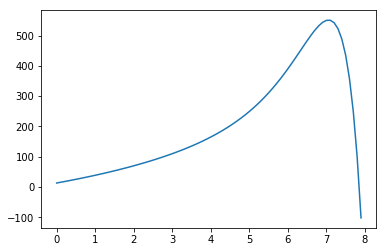

In [13]:
x_axis = np.arange(0, 8, 0.1)
x_data = []
for i in x_axis:
    x_data.append(vecto(i)) 
x_data = np.array(x_data)
y_vals = np.matmul(x_data, sess.run(W)) + sess.run(b)

plt.plot(x_axis, y_vals)
plt.show()

To avoid the problem of over-fitting we will want to find the right balance between the amount of training and predicting the results.
<br>That is, not to train too little or to train too much.

As can be seen in the picture below, we would like to find the minimum "Test sample".

<img src="Train_Test_Error.png" width="500px"/>

[Credit](https://gerardnico.com/data_mining/overfitting)

[^ contents](#contents)
## Regularization
<a id='regularization'></a>

In order to deal with over-fitting there are several methods ([link](https://elitedatascience.com/overfitting-in-machine-learning#how-to-prevent)).
<br>We will now look at several methods.

[^ contents](#contents)
### Lasso and Ridge
<a id='lasso_ridge'></a>

This method is to change the loss function.
<br>This method has two ways, one of Lasso and the other of Ridge.
* <b>Lasso:</b> more aggressive towards smaller weights, so many end-up zero.
<br>$ J(w,b) = (\frac{1}{2m} * \sum_{i=1}^{m} (Wx_i + b - y_i)^2)+\lambda{||W||}_2 $.
<br>where $ {||W||}_p = (\sum_{i=1}^{k} |w_i|^p)^{\frac{1}{p}} $
* <b>Ridge:</b> more aggressive towards bigger weights, many weights may end-up being small, but not zero.
<br>$ J(w,b) = (\frac{1}{2m} * \sum_{i=1}^{m} (Wx_i + b - y_i)^2)+\frac{\lambda}{2}({||W||}_2)^2 $.
<br>where $ {||W||}_p = (\sum_{i=1}^{k} |w_i|^p)^{\frac{1}{p}} $

In order for RIDGE to work we need to change the loss function to 
<br>loss = tf.reduce_mean(tf.pow(y - y_, 2)) + 0.1\*tf.nn.l2_loss(W)
<br>Note: tf.nn.l2_loss(W) = tf.reduce_sum(W**2)/2.

In the equation of Lasso there is a problem with the derivation because there is an absolute value in his lust, which makes it harder for us to cut and therefore we will use another method to realize his code.

In [14]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

def vecto(x):
    ret = []
    for i in range(1,21):
        ret.append(x**i / 7.**i)
    return ret

Displaying an array of weights

In [15]:
clf = linear_model.Lasso(alpha=0.1)

clf.fit([vecto(2), vecto(3), vecto(4), vecto(6), vecto(7)], [70,110,165,390,550])

print(clf.coef_)

[  0.         221.82464187 236.00210045  54.74659255   0.
   0.           0.           0.           0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -8.49251129]


The graph looks with less over-fitting than the graph [above](#example_over_fitting) with 20 features.

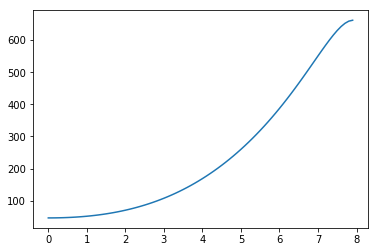

In [16]:
x_axis = np.arange(0,8,0.1)
x_data=[]

for i in x_axis:
    x_data.append(vecto(i))
    
x_data = np.array(x_data)

clf.predict([vecto(1),vecto(2)])

y_vals = clf.predict(x_data)

plt.plot(x_axis, y_vals)
plt.show()

[^ contents](#contents)
### Early Stopping
<a id='early_stopping'></a>

A second method looks for the minimum of the loss function, which is checked for the validation, every few epocks and saves the votes that give this minimum.
<br>At the end of the run we will return to the minimum we found during the run and take the weights of the model that gave us this good result, the minimum of the loss function.

<img src="The_early_stopping_criterion.png" width="550px"/>
[Credit](https://www.researchgate.net/profile/Giuseppina_Gini/publication/4310358/figure/fig2/AS:279627110076459@1443679706731/The-early-stopping-criterion.png)

[^ Contents](#contents)
## Normalization
<a id='normalization'></a>

When we use numbers as features, then there may be a problem that the numbers are too large because the weights will be affected.

So we want to normalize the features. There are two ways to normalize:
1. The simple way is to divide all the numbers with the largest value, so we always get numbers that are in the range [-1,1].
2. We subtract the mean number from each number and divide by their standard deviation.

[^ Contents](#contents)
# Logistic Regression
<a id='logistic_regression'></a>

Another type of problems we focus on now is classification.
<br>In this type of problem we will obtain information that is divided again into X and Y, where X is the features and Y is the X classes.
<br>That is we will want to predict the class of $ x_i $.
<br>For example, there are two types of circles, black and white, with different features.
<br>Then we want each new circle we have not seen before and we see its features now for the first time we know whether it is black or white.

Logistic regression solves only classification problems that there are only two classes.
<br>Suppose that one class 0 and 1 this second class.
<br>According to the assumption we will have to actually find a function that gives values in the range [0,1].

We will select the Sigmoid function, and in our case it will look like this $ h(x) =  \dfrac{1}{1 + e^{-(xW+b)}} $

A prediction of 1 will mean that we are certain that the value is 1.
<br>We want to make the following two equations exist:
1. $ p(y_i = 1|x_i;W,b) = h(x_i) $
2. $ p(y_i = 0|x_i;W,b) = 1 - h(x_i) $

In general, we want that $ p(y_i|x_i;W,b) = {h(x_i)}^{y_i}(1 - h(x_i))^{1 - y_i} $. We can see that this equation is correct when we set y to 0 or 1. 

[^ contents](#contents)
## Motivation To Loss Function
<a id='motivation_to_loss_function_logistic'></a>

We want to maximize the probability  $ p(y|x;w,b) $ to say that the probability of getting yi given $x_i, w, n$ is the highest, which means that the data we received is the most likely, and not that it is reasonable but with a lot of noise.

$$ p(y|x;w,b) = \prod_{i=1}^{m} p(y_i|x_i;w,b) = \prod_{i=1}^{m}  {h(x_i)}^{y_i}(1 - h(x_i))^{1 - y_i} $$

We will apply log on both wings.

$$ log(p(y|x;w,b)) = log\left(\prod_{i=1}^{m}  {h(x_i)}^{y_i}(1 - h(x_i))^{1 - y_i}\right) = \sum_{i=1}^{m} log\left( {h(x_i)}^{y_i}(1 - h(x_i))^{1 - y_i}\right) = \sum_{i=1}^{m} {y_i log(h(x_i)) + (1 - y_i) log(1 - h(x_i)))} $$

$$ J(W,b) = -\frac{1}{m}\sum_{i=1}^{m} {y_i log(h(x_i)) + (1 - y_i) log(1 - h(x_i)))} $$

[^ contents](#contents)
## Gradient Descent
<a id='gradient_descent_logistic'></a>

Note: The derivative of the Sigmoid function $ h'(x) = \left(\dfrac{1}{1 + e^{-(xW+b)}}\right)' = h(x)(1-h(x)) $

$ \frac{\partial J}{\partial w_i} = ... = \frac{1}{m} \sum_{i=1}^{m} {(y_i - h(x_i))*x_{i,j}} $

We get exact same gradient $ \frac{1}{m} \sum_{i=1}^{m} x_{i}{(h(x_i) - y_i)} $

[^ contents](#contents)
## Example Of Classification
<a id='example_of_classification'></a>

We will show code as an example of classification, the example will be classifying a text message to urgent / non-urgent, based on its words.

In order to present the solution, we will bring some explanations.

<a id='bag_of_words'></a>

When we have a very large database with lots of features and all $x_i$ has only some features and we want to know what features are in each of $x_i$, then the method is to create an array the size of the features and mark 1 in the index $i$ to say that feature $i$ is in $x_i$, twice we will write 2, etc. This method is called Bag-of-Words Model.

We will use this method even when we have a dataset of sentences and want to know which word appears in each sentence and how many times it appears in the sentence, we will build an array the size of the number of quantity different words together in sentences.

In [17]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import tensorflow as tf

import numpy as np

In [18]:
vocabulary_size = 0 #can use "global" keyword
word2location = {}
ps = PorterStemmer()

def prepare_vocabulary(data):
    idx = 0
    for sentence in data:
        for word in word_tokenize(sentence):
            if ps.stem(word) not in word2location:
                word2location[word] = idx
                idx += 1      
    return idx

def convert2vec(sentence):
    res_vec = np.zeros(vocabulary_size)
    for word in word_tokenize(sentence):
        stemmer = ps.stem(word)
        if stemmer in word2location:
            res_vec[word2location[stemmer]] += 1
    return res_vec

In [19]:
data = ["Where are you? I'm trying to reach you for half an hour already, contact me ASAP I need to leave now!",
        "I want to go out for lunch, let me know in the next couple of minutes if you would like to join.", 
        "I was wondering whether you are planning to  attend the party we are having next month.", 
        "I wanted to share my thoughts with you."]
vocabulary_size = prepare_vocabulary(data)

In [20]:
 print(convert2vec(data[1])) # "I want to go out for lunch, let me know in the next couple of minutes if you would like to join."

[0. 0. 1. 0. 1. 0. 0. 2. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [21]:
features = vocabulary_size
eps = 1e-12
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))

Adding an epsilon is required especially because we have W = 0 and b = 0, and the log function should not receive 0.

In [22]:
y = 1 / (1.0 + tf.exp(-(tf.matmul(x,W) + b)))
loss1 = -(y_ * tf.log(y + eps) + (1 - y_) * tf.log(1-y + eps))
loss = tf.reduce_mean(loss1)
update = tf.train.GradientDescentOptimizer(0.00001).minimize(loss)

x_data is the display of the output "convert2vec" for each sentence.
<br>y_data is the urgent / non-urgent type of sentence where 1 is urgent and 0 is non-urgent

In [23]:
data_x = np.array([convert2vec(data[0]), convert2vec(data[1]), convert2vec(data[2]), convert2vec(data[3])])
data_y = np.array([[1],[1],[0],[0]])

In [24]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,10000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})

After we created the program that learns to identify the types of sentences, now we will try to examine its results.

In order for the model to work with high accuracy, of course, the dataset is much larger.

In [25]:
def logistic_fun(z):
    return 1/(1.0 + np.exp(-z))

test1 = "I need you now! Please answer ASAP!"

#pdb.set_trace()
print('Prediction for: "' + test1 + '"', logistic_fun(np.matmul(np.array([convert2vec(test1)]),sess.run(W)) + sess.run(b))[0][0])

Prediction for: "I need you now! Please answer ASAP!" 0.5164009006873241


[^ contents](#contents)
## The Quality Of The Classifier
<a id='the_quality_of_the_classifier'></a>

There are several indices for checking the accuracy of a classifier.
Each indice shows the accuracy of another field.

We can understand the metrics by the following table:
<img src="Accuracy_table.png" width="550px"/>

The indices are:

1. Accuracy = $\frac{Trues}{All}$: $\frac{True Positive + True Negative}{True Positive + True Negative + False Negative + False Positive}$
2. Recall = What fraction of positives did we actually find: $\frac{True Positive}{True Positive + False Negative}$
3. Precision = If we say positive, how precise are we: $\frac{True Positive}{True Positive + False Positive}$
4. F-Measure: $2\frac{Precision * Recall}{Precision + Recall}$

[^ contents](#contents)
## Imbalanced Data
<a id='imbalanced_data'></a>

One of the difficulties in creating a valid dataset is to create it so that the data is balanced so there will be few examples from one class and much from another.
<br>But even if we devoured an unbalanced dataset we could use it.
<br>We'll show some solutions how to use it correctly.
<br>For the convenience of the explanation it is said that there is 1% class and 99% of the second class.
(Note: all the numbers shown for the imbalance are spoken after the division into the train and test, if not then divided into a train and a test, where each of the data for each class is divided by the example of 7:3.)
1. Compare the amount of data from each class by taking each class as much information as the class information with the least amount of information.
2. Each epoch will take 1% randomly from the 99% and actually we will have 1% of the first class and 1% of the second class.
3. Divide 99% to 99 times 1% and each of them attach the 1% of the small class.
4. In this method, we will not change the dataset structure, but we will change our attitude toward predictive errors for examples of the small class, ie we will "penalize" the model more strongly for predicting error in the small class.

[^ contents](#contents)
## Multiple Classes (SoftMax)
<a id='multiple_classes'></a>

So far, we have been dealing with classifications that have two departments, but we do not always have only two departments. Sometimes we have more, but we still want to classify the departments.
<br>So far, we have been dealing with classifications that have two departments, but we do not always have only two departments. 
<br>Sometimes we have more, but we still want to classify the departments.
<br>For example, if we have 4 classes A, B, C, D and we have an object that belongs to class C, then we say [0,0,1,0]

Given $x_i$, we would like to know which class it belongs to, so we will use the following formula and check the result for each department and select the class with the maximum value.

$$ h(y = i|x) = \frac{e^{x^TW_i+b_i}}{\sum_{j=1}^{k} {e^{x^TW_j+b_j}}} $$

Where: $ x $ is an array that represents all the values of the features of $ x $,
<br> $ W_i $ is one line from the $W$ matrix.
The columns of matrix $W$ represent the features and the rows represent the classes.
Ie $W_{i,j}$ represents the weight of feature $i$ in class $j$

Note: $ \sum_{i\in\{1,2,...,k-1\}} {h(y = i|x)} = 1 $
<br>Note: W is a matrix where each row is a class and each column is a property.
<br>Note: Logistic regression is a private case of softmax, which means softmax that has only two classes.

The loss function of softmax is: loss = -tf.reduce_mean(y_*tf.log(y)), where y_ and y are both vectors.

Now look at an example of using softmax:

[^ contents](#contents)
## Example - SMS Classification
<a id='example_sms_classification'></a>

We present a program that classifies SMS messages into three different departments
* Finance
* Work
* Family & Friends

We will use Bag-of-Words Model.

In [26]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import tensorflow as tf

import numpy as np

In [27]:
vocabulary_size = 0 #can use "global" keyword
word2location = {}
ps = PorterStemmer()

def prepare_vocabulary(data):
    idx = 0
    for sentence in data:
        for word in word_tokenize(sentence):
            if ps.stem(word) not in word2location:
                word2location[word] = idx
                idx += 1      
    return idx

def convert2vec(sentence):
    res_vec = np.zeros(vocabulary_size)
    for word in word_tokenize(sentence):
        stemmer = ps.stem(word)
        if stemmer in word2location:
            res_vec[word2location[stemmer]] += 1
    return res_vec

Counting the number of features, that is, the amount of words in a dictionary.

In [28]:
data = [
	"Your auto payment of $50 was charges successfully!", 
	"You have received a refund of $20", 
	"Please complete your power point presentation by tomorrow.", 
	"You must arrive on time tomorrow, otherwise the manager will want to talk to you",
	"How about celebrating Bob's birthday party next week?", 
	"Everyone is waiting for you at home, please come home early!"]
vocabulary_size = prepare_vocabulary(data)

The training phase of the model

In [29]:
features = vocabulary_size
categories = 3
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, categories])
W = tf.Variable(tf.zeros([features,categories]))
b = tf.Variable(tf.zeros([categories])) # One b for each class

y = tf.nn.softmax(tf.matmul(x, W) + b)
loss = -tf.reduce_mean(y_*tf.log(y))

update = tf.train.GradientDescentOptimizer(0.00001).minimize(loss)

Create the data for training as [above](#bag_of_words)

In [30]:
data_x = np.array([convert2vec(data[i]) for i in range(len(data))])
data_y = np.array([[1,0,0],[1,0,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1]])

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,10000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})

The testing phase of the model

In [31]:
test1 = "Your payment has been received, no refund is currently available."
test2 = "The manager said that your presentation went well, but next time make sure to arrive on time."
test3 = "We are all waiting for you at the birthday party!"

print('\nPrediction for: "' + test1 + ': "', sess.run(y, feed_dict={x:[convert2vec(test1)]}))
print('\nPrediction for: "' + test2 + ': "', sess.run(y, feed_dict={x:[convert2vec(test2)]}))
print('\nPrediction for: "' + test3 + ': "', sess.run(y, feed_dict={x:[convert2vec(test3)]}))


Prediction for: "Your payment has been received, no refund is currently available.: " [[0.33395392 0.3339286  0.33211747]]

Prediction for: "The manager said that your presentation went well, but next time make sure to arrive on time.: " [[0.32783738 0.34251705 0.32964554]]

Prediction for: "We are all waiting for you at the birthday party!: " [[0.33090654 0.33267376 0.3364197 ]]


IMPORTANT NOTE: Because the computer can only represent up to a certain level of precision, then when we want to represent a number with higher accuracy, the computer will round the numbers, that is, if we have a very close to 0 and use log on the number,
The computer will turn the number to 0 and get we an error (since log 0 is not set).

In order to deal with such problems, we will always prefer to use functions that are implemented by TensorFlow.
* tf.nn.sigmoid(tf.matmul(x,W) + b)
* tf.nn.sigmoid_cross_entropy_with_logits()
* tf.nn.softmax_cross _entropy_with_logits_v2()

[^ Contents](#contents)
# Summary
<a id='summary'></a>

After we saw how to realize the logistic regression and the softmax, we now see the structure of the model that we are building visually.

<br><center> <Big> Logistic Regression </Big> </center>
<img src="logistic_regression.png" width="400px"/>

Where activation function is sigmoid and $x_i$ is the feature $i$.

<br><center> <Big> Softmax </Big> </center>
<img src="softmax.png" width="400px"/>
